/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


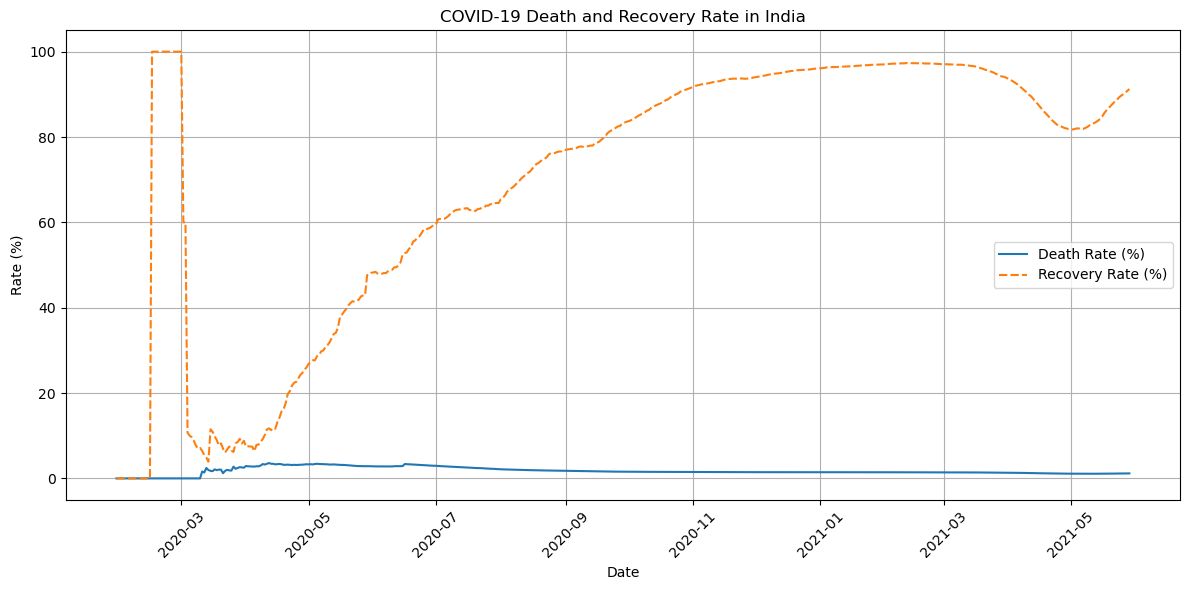

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


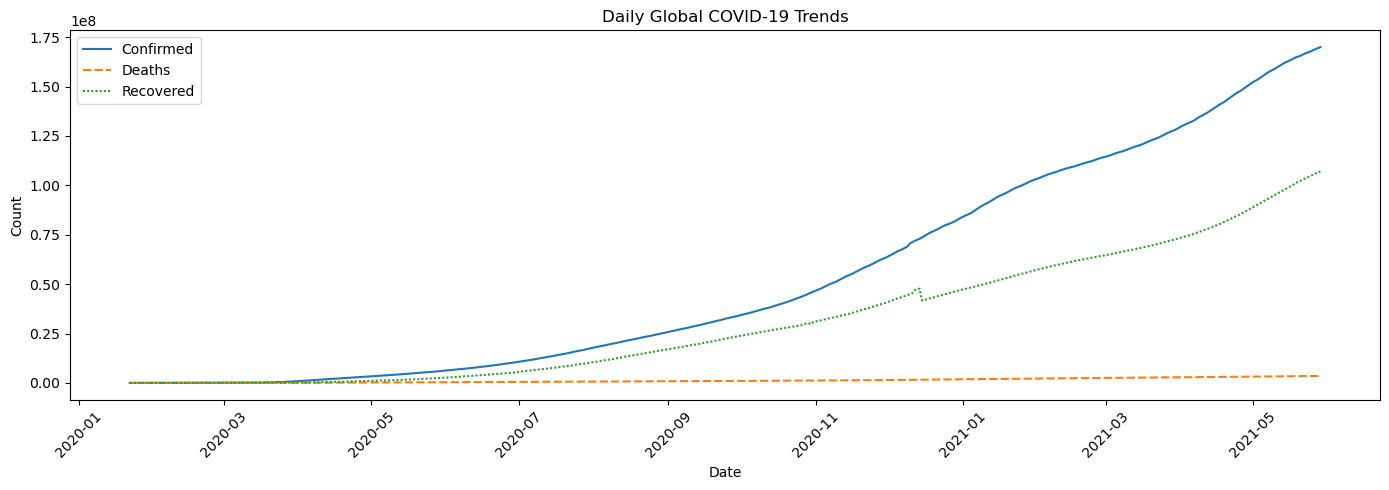

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


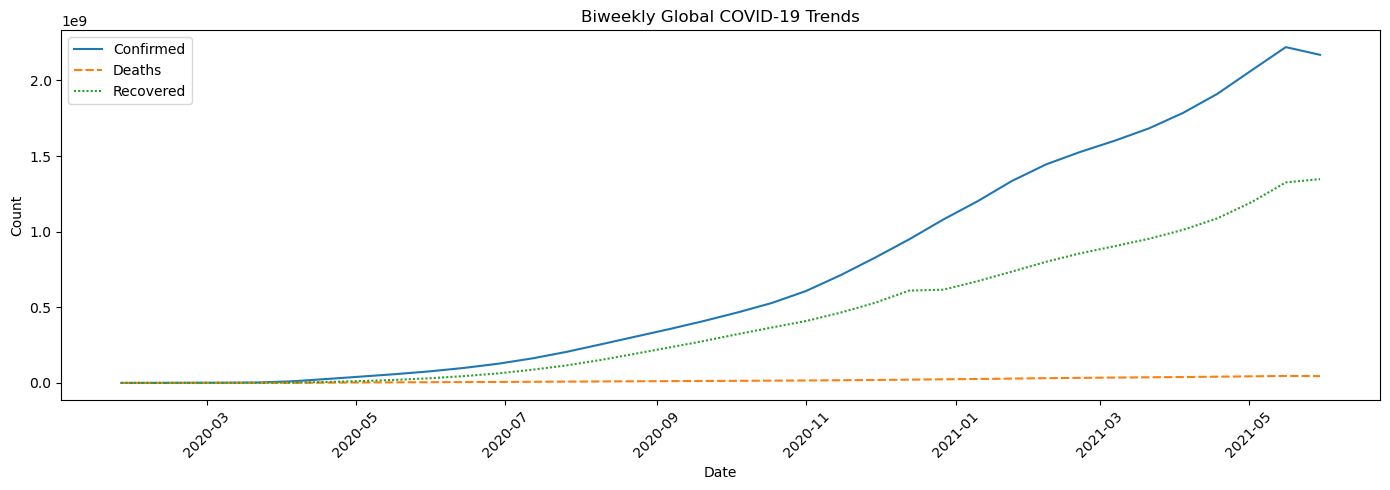

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


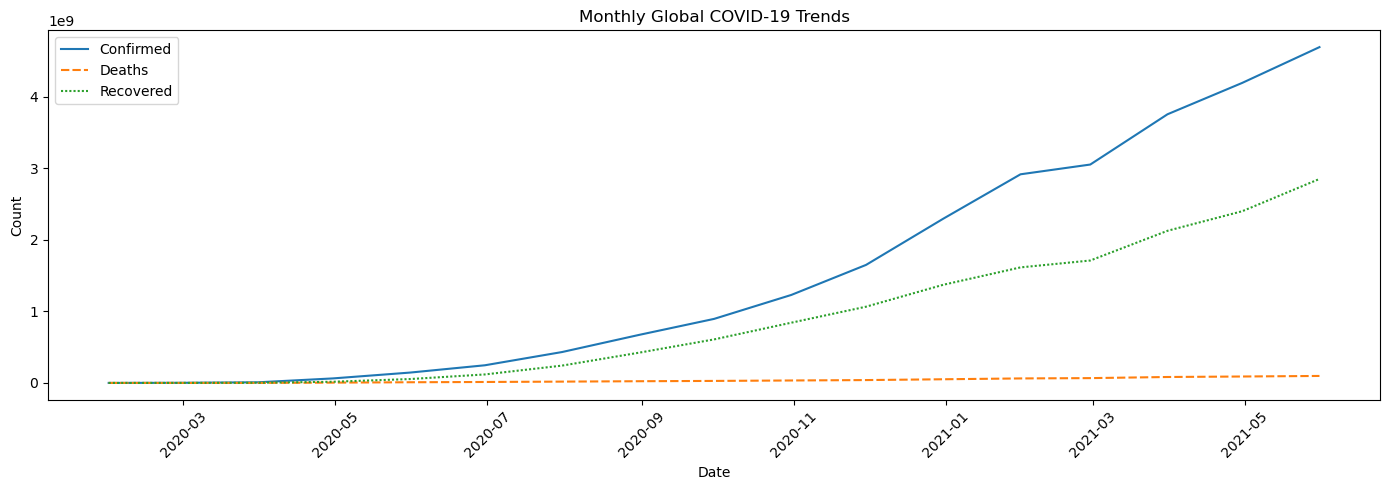

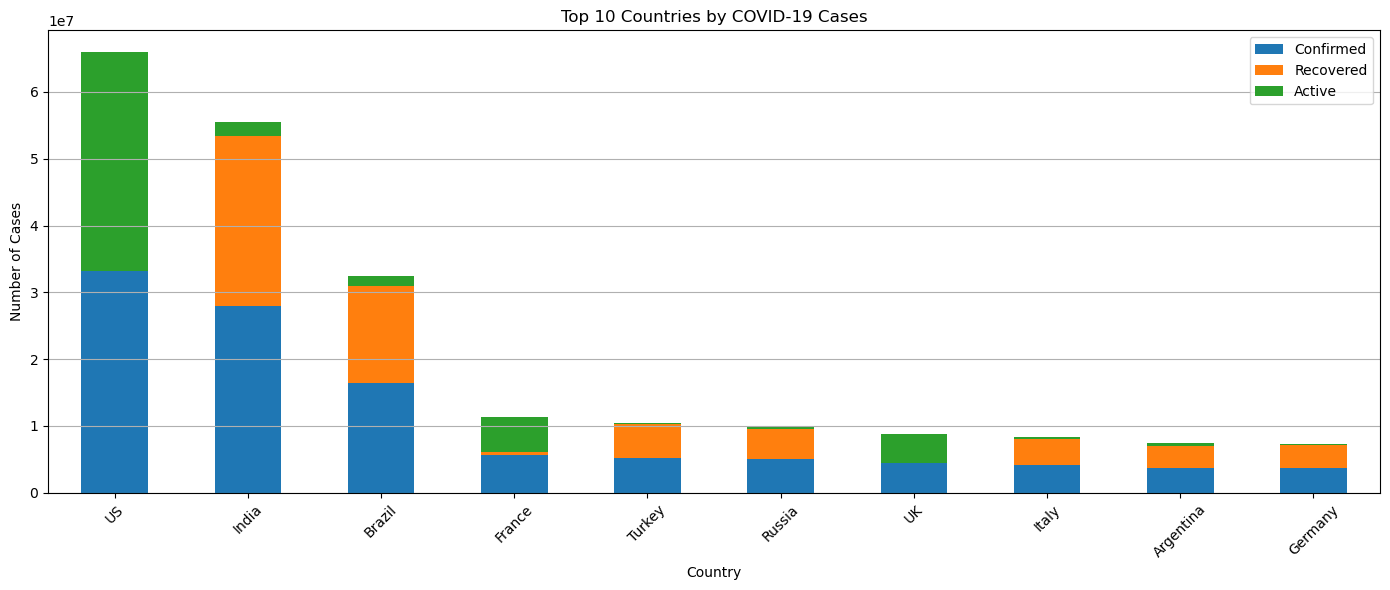

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ Used for line plots

# Load the dataset
df = pd.read_csv("covid_19_data.csv")

# Convert date column to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Fill missing values and calculate active cases
df.fillna({'Confirmed': 0, 'Deaths': 0, 'Recovered': 0}, inplace=True)
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# ---- INDIA-SPECIFIC ANALYSIS ----
# Group data by date for India
india_data = df[df['Country/Region'] == 'India']
india_data = india_data.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Compute recovery and death rate
india_data['Death Rate (%)'] = (india_data['Deaths'] / india_data['Confirmed']) * 100
india_data['Recovery Rate (%)'] = (india_data['Recovered'] / india_data['Confirmed']) * 100

# ✅ Line plot using Seaborn for India's death and recovery rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=india_data[['Death Rate (%)', 'Recovery Rate (%)']])
plt.title('COVID-19 Death and Recovery Rate in India')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- GLOBAL TEMPORAL TRENDS ----
# Group by date globally
global_trends = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Daily trend
plt.figure(figsize=(14, 5))
sns.lineplot(data=global_trends)  # ✅ Seaborn
plt.title('Daily Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Biweekly trend
biweekly = global_trends.resample('2W').sum()
plt.figure(figsize=(14, 5))
sns.lineplot(data=biweekly)  # ✅ Seaborn
plt.title('Biweekly Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly trend
monthly = global_trends.resample('M').sum()
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly)  # ✅ Seaborn
plt.title('Monthly Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- COUNTRY-WISE ANALYSIS ----
# Get latest date's data
latest_date = df['ObservationDate'].max()
latest_data = df[df['ObservationDate'] == latest_date]

# Group by country and summarize
country_summary = latest_data.groupby('Country/Region')[['Confirmed', 'Recovered', 'Active']].sum()

# Get top 10 countries
top_countries = country_summary.sort_values(by='Confirmed', ascending=False).head(10)

# ✅ Stacked bar plot using matplotlib (not seaborn)
top_countries[['Confirmed', 'Recovered', 'Active']].plot(
    kind='bar', stacked=True, figsize=(14, 6)
)
plt.title('Top 10 Countries by COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

